In [1]:
# Assuming that the fridom package is in the parent directory
# If fridom is installed, the next two lines are not needed
import sys, os
sys.path.append(os.path.abspath('..'))

import fridom.ShallowWater as sw

# Animations
There are currently two different approaches implemented to make moving images of the simulation :
 - **Live Animation**: Shows the model state live during the simulation (doesn't create a video).
 - **Video Animation**: Adds a figure to a video every ... time step. 

## Video Animation
To create a video animation we need to build a plotting class on top of the ModelPlotter class.

In [2]:
# Define the plotter
class MyPlotter(sw.ModelPlotter):
    def update_figure(fig, z, time, **kwargs):
        # arguments must be (fig, z, time, **kwargs)
        # Any figure properties can be updated here
        sw.Plot(z.h)(z, fig=fig, cmax=0.3, vmax=1.6)
        fig.gca().set_title(f"Random phase at t = {time:.3f}")
        return


# Now build the model
mset = sw.ModelSettings(N=[255, 255])
mset.gpu = True
mset.enable_vid_anim = True
mset.vid_plotter = MyPlotter
mset.vid_anim_interval = 20
grid = sw.Grid(mset)
model = sw.Model(mset, grid)
model.z = sw.InitialConditions.Random(mset, grid)
model.run(runlen=2.0)
model.show_video()

100%|██████████| 1000/1000 [00:10<00:00, 99.96it/s]


## Video Animation
The video animation works similar to the live animation, we can use the same plotter class or define a different one.

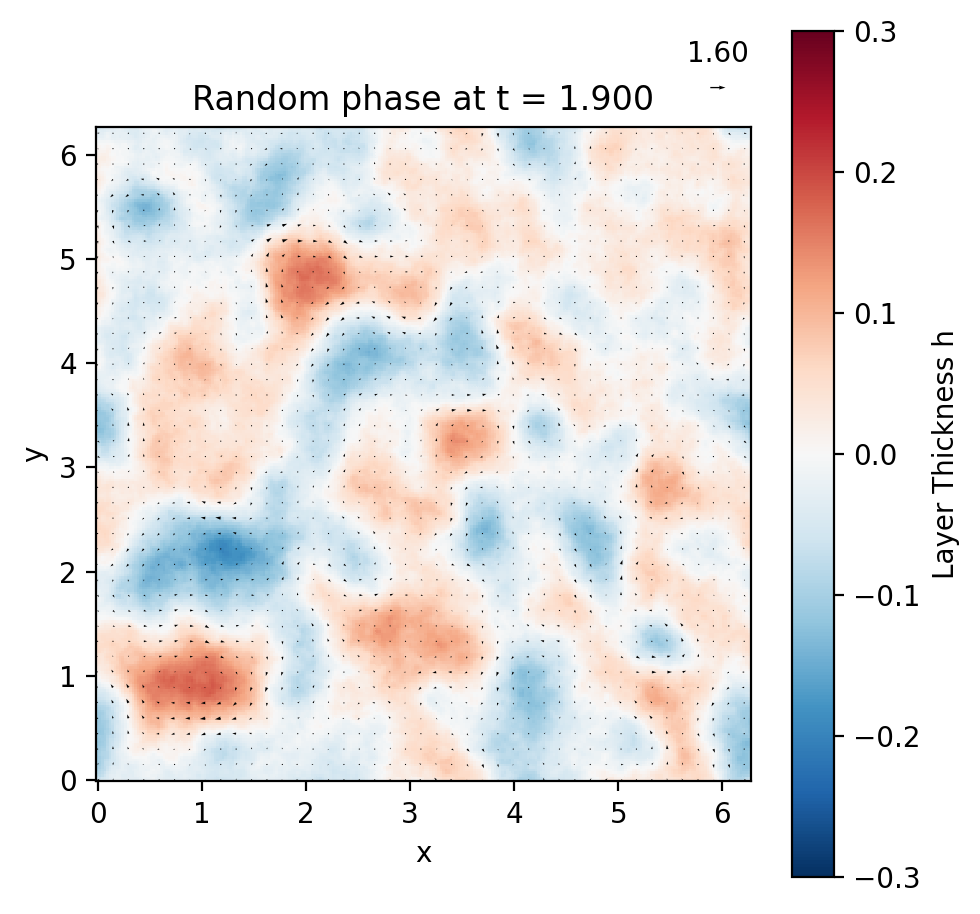

In [3]:
# Define the plotter
class MyPlotter(sw.ModelPlotter):
    def update_figure(fig, z, time, **kwargs):
        # arguments must be (fig, z, time, **kwargs)
        # Any figure properties can be updated here
        sw.Plot(z.h)(z, fig=fig, cmax=0.3, vmax=1.6)
        fig.gca().set_title(f"Random phase at t = {time:.3f}")
        return


# Now build the model
mset = sw.ModelSettings(N=[255, 255])
mset.enable_live_anim = True
mset.live_plotter = MyPlotter
mset.enable_tqdm = False        # is not compatible with live plotting
grid = sw.Grid(mset)
model = sw.Model(mset, grid)
model.z = sw.InitialConditions.Random(mset, grid)
model.run(runlen=2)